In [1]:
import torch
import torch.optim as optim
import torch.utils.data
import torch.backends.cudnn as cudnn
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#--- hyperparameters ---
N_EPOCHS = 10
BATCH_SIZE_TRAIN = 100
BATCH_SIZE_TEST = 100
LR = 0.001

In [3]:
#--- fixed constants ---
NUM_CLASSES = 24
DATA_DIR = '../data/sign_mnist_%s'

In [16]:
# --- Dataset initialization ---

# We transform image files' contents to tensors
# Plus, we can add random transformations to the training data if we like
# Think on what kind of transformations may be meaningful for this data.
# Eg., horizontal-flip is definitely a bad idea for sign language data.
# You can use another transformation here if you find a better one.
train_transform = transforms.Compose([  transforms.ColorJitter(),
                                        transforms.RandomPerspective(distortion_scale=0.2),
                                        transforms.ToTensor()])
test_transform = transforms.Compose([transforms.ToTensor()])

train_set = datasets.ImageFolder(DATA_DIR % 'train', transform=train_transform)
dev_set   = datasets.ImageFolder(DATA_DIR % 'dev',   transform=test_transform)
test_set  = datasets.ImageFolder(DATA_DIR % 'test',  transform=test_transform)


# Create Pytorch data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=BATCH_SIZE_TRAIN, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=BATCH_SIZE_TEST, shuffle=False)

In [5]:
#--- model ---
class CNN(nn.Module):
    def __init__(self, num_classes=NUM_CLASSES):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc = nn.Linear(7*7*32, NUM_CLASSES)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out


using gpu
Training: Epoch 0 - Batch 0/275: Loss: 3.3358 | Train Acc: 5.000% (5/100)
Training: Epoch 0 - Batch 1/275: Loss: 3.4329 | Train Acc: 5.000% (10/200)
Training: Epoch 0 - Batch 2/275: Loss: 3.3957 | Train Acc: 7.000% (21/300)
Training: Epoch 0 - Batch 3/275: Loss: 3.3275 | Train Acc: 6.750% (27/400)
Training: Epoch 0 - Batch 4/275: Loss: 3.2989 | Train Acc: 8.400% (42/500)
Training: Epoch 0 - Batch 5/275: Loss: 3.2648 | Train Acc: 10.000% (60/600)
Training: Epoch 0 - Batch 6/275: Loss: 3.2372 | Train Acc: 10.571% (74/700)
Training: Epoch 0 - Batch 7/275: Loss: 3.1965 | Train Acc: 11.500% (92/800)
Training: Epoch 0 - Batch 8/275: Loss: 3.1600 | Train Acc: 12.111% (109/900)
Training: Epoch 0 - Batch 9/275: Loss: 3.1171 | Train Acc: 13.200% (132/1000)
Training: Epoch 0 - Batch 10/275: Loss: 3.0891 | Train Acc: 13.636% (150/1100)
Training: Epoch 0 - Batch 11/275: Loss: 3.0602 | Train Acc: 14.083% (169/1200)
Training: Epoch 0 - Batch 12/275: Loss: 3.0219 | Train Acc: 15.000% (195/13

Training: Epoch 0 - Batch 103/275: Loss: 1.3800 | Train Acc: 62.981% (6550/10400)
Training: Epoch 0 - Batch 104/275: Loss: 1.3721 | Train Acc: 63.162% (6632/10500)
Training: Epoch 0 - Batch 105/275: Loss: 1.3639 | Train Acc: 63.396% (6720/10600)
Training: Epoch 0 - Batch 106/275: Loss: 1.3559 | Train Acc: 63.645% (6810/10700)
Training: Epoch 0 - Batch 107/275: Loss: 1.3481 | Train Acc: 63.870% (6898/10800)
Training: Epoch 0 - Batch 108/275: Loss: 1.3402 | Train Acc: 64.128% (6990/10900)
Training: Epoch 0 - Batch 109/275: Loss: 1.3320 | Train Acc: 64.382% (7082/11000)
Training: Epoch 0 - Batch 110/275: Loss: 1.3249 | Train Acc: 64.586% (7169/11100)
Training: Epoch 0 - Batch 111/275: Loss: 1.3175 | Train Acc: 64.830% (7261/11200)
Training: Epoch 0 - Batch 112/275: Loss: 1.3111 | Train Acc: 65.053% (7351/11300)
Training: Epoch 0 - Batch 113/275: Loss: 1.3038 | Train Acc: 65.316% (7446/11400)
Training: Epoch 0 - Batch 114/275: Loss: 1.2968 | Train Acc: 65.539% (7537/11500)
Training: Epoch 

Training: Epoch 0 - Batch 204/275: Loss: 0.9001 | Train Acc: 77.624% (15913/20500)
Training: Epoch 0 - Batch 205/275: Loss: 0.8972 | Train Acc: 77.709% (16008/20600)
Training: Epoch 0 - Batch 206/275: Loss: 0.8943 | Train Acc: 77.787% (16102/20700)
Training: Epoch 0 - Batch 207/275: Loss: 0.8917 | Train Acc: 77.865% (16196/20800)
Training: Epoch 0 - Batch 208/275: Loss: 0.8889 | Train Acc: 77.947% (16291/20900)
Training: Epoch 0 - Batch 209/275: Loss: 0.8863 | Train Acc: 78.033% (16387/21000)
Training: Epoch 0 - Batch 210/275: Loss: 0.8838 | Train Acc: 78.114% (16482/21100)
Training: Epoch 0 - Batch 211/275: Loss: 0.8810 | Train Acc: 78.193% (16577/21200)
Training: Epoch 0 - Batch 212/275: Loss: 0.8784 | Train Acc: 78.282% (16674/21300)
Training: Epoch 0 - Batch 213/275: Loss: 0.8760 | Train Acc: 78.346% (16766/21400)
Training: Epoch 0 - Batch 214/275: Loss: 0.8734 | Train Acc: 78.433% (16863/21500)
Training: Epoch 0 - Batch 215/275: Loss: 0.8709 | Train Acc: 78.514% (16959/21600)
Trai

Training: Epoch 1 - Batch 30/275: Loss: 0.2659 | Train Acc: 97.355% (3018/3100)
Training: Epoch 1 - Batch 31/275: Loss: 0.2655 | Train Acc: 97.312% (3114/3200)
Training: Epoch 1 - Batch 32/275: Loss: 0.2662 | Train Acc: 97.273% (3210/3300)
Training: Epoch 1 - Batch 33/275: Loss: 0.2656 | Train Acc: 97.235% (3306/3400)
Training: Epoch 1 - Batch 34/275: Loss: 0.2649 | Train Acc: 97.257% (3404/3500)
Training: Epoch 1 - Batch 35/275: Loss: 0.2639 | Train Acc: 97.250% (3501/3600)
Training: Epoch 1 - Batch 36/275: Loss: 0.2639 | Train Acc: 97.270% (3599/3700)
Training: Epoch 1 - Batch 37/275: Loss: 0.2633 | Train Acc: 97.289% (3697/3800)
Training: Epoch 1 - Batch 38/275: Loss: 0.2618 | Train Acc: 97.308% (3795/3900)
Training: Epoch 1 - Batch 39/275: Loss: 0.2614 | Train Acc: 97.350% (3894/4000)
Training: Epoch 1 - Batch 40/275: Loss: 0.2622 | Train Acc: 97.317% (3990/4100)
Training: Epoch 1 - Batch 41/275: Loss: 0.2616 | Train Acc: 97.333% (4088/4200)
Training: Epoch 1 - Batch 42/275: Loss: 

Training: Epoch 1 - Batch 132/275: Loss: 0.2544 | Train Acc: 97.692% (12993/13300)
Training: Epoch 1 - Batch 133/275: Loss: 0.2541 | Train Acc: 97.701% (13092/13400)
Training: Epoch 1 - Batch 134/275: Loss: 0.2545 | Train Acc: 97.681% (13187/13500)
Training: Epoch 1 - Batch 135/275: Loss: 0.2545 | Train Acc: 97.662% (13282/13600)
Training: Epoch 1 - Batch 136/275: Loss: 0.2549 | Train Acc: 97.672% (13381/13700)
Training: Epoch 1 - Batch 137/275: Loss: 0.2548 | Train Acc: 97.674% (13479/13800)
Training: Epoch 1 - Batch 138/275: Loss: 0.2552 | Train Acc: 97.669% (13576/13900)
Training: Epoch 1 - Batch 139/275: Loss: 0.2550 | Train Acc: 97.671% (13674/14000)
Training: Epoch 1 - Batch 140/275: Loss: 0.2551 | Train Acc: 97.681% (13773/14100)
Training: Epoch 1 - Batch 141/275: Loss: 0.2552 | Train Acc: 97.683% (13871/14200)
Training: Epoch 1 - Batch 142/275: Loss: 0.2551 | Train Acc: 97.685% (13969/14300)
Training: Epoch 1 - Batch 143/275: Loss: 0.2550 | Train Acc: 97.681% (14066/14400)
Trai

Training: Epoch 1 - Batch 231/275: Loss: 0.2527 | Train Acc: 97.733% (22674/23200)
Training: Epoch 1 - Batch 232/275: Loss: 0.2526 | Train Acc: 97.738% (22773/23300)
Training: Epoch 1 - Batch 233/275: Loss: 0.2525 | Train Acc: 97.744% (22872/23400)
Training: Epoch 1 - Batch 234/275: Loss: 0.2524 | Train Acc: 97.753% (22972/23500)
Training: Epoch 1 - Batch 235/275: Loss: 0.2524 | Train Acc: 97.754% (23070/23600)
Training: Epoch 1 - Batch 236/275: Loss: 0.2524 | Train Acc: 97.759% (23169/23700)
Training: Epoch 1 - Batch 237/275: Loss: 0.2525 | Train Acc: 97.756% (23266/23800)
Training: Epoch 1 - Batch 238/275: Loss: 0.2525 | Train Acc: 97.753% (23363/23900)
Training: Epoch 1 - Batch 239/275: Loss: 0.2522 | Train Acc: 97.762% (23463/24000)
Training: Epoch 1 - Batch 240/275: Loss: 0.2522 | Train Acc: 97.772% (23563/24100)
Training: Epoch 1 - Batch 241/275: Loss: 0.2521 | Train Acc: 97.777% (23662/24200)
Training: Epoch 1 - Batch 242/275: Loss: 0.2520 | Train Acc: 97.774% (23759/24300)
Trai

Training: Epoch 2 - Batch 59/275: Loss: 0.2429 | Train Acc: 98.033% (5882/6000)
Training: Epoch 2 - Batch 60/275: Loss: 0.2431 | Train Acc: 98.049% (5981/6100)
Training: Epoch 2 - Batch 61/275: Loss: 0.2437 | Train Acc: 98.048% (6079/6200)
Training: Epoch 2 - Batch 62/275: Loss: 0.2432 | Train Acc: 98.063% (6178/6300)
Training: Epoch 2 - Batch 63/275: Loss: 0.2438 | Train Acc: 98.062% (6276/6400)
Training: Epoch 2 - Batch 64/275: Loss: 0.2437 | Train Acc: 98.031% (6372/6500)
Training: Epoch 2 - Batch 65/275: Loss: 0.2434 | Train Acc: 98.061% (6472/6600)
Training: Epoch 2 - Batch 66/275: Loss: 0.2435 | Train Acc: 98.045% (6569/6700)
Training: Epoch 2 - Batch 67/275: Loss: 0.2429 | Train Acc: 98.059% (6668/6800)
Training: Epoch 2 - Batch 68/275: Loss: 0.2421 | Train Acc: 98.087% (6768/6900)
Training: Epoch 2 - Batch 69/275: Loss: 0.2421 | Train Acc: 98.114% (6868/7000)
Training: Epoch 2 - Batch 70/275: Loss: 0.2424 | Train Acc: 98.099% (6965/7100)
Training: Epoch 2 - Batch 71/275: Loss: 

Training: Epoch 2 - Batch 162/275: Loss: 0.2423 | Train Acc: 98.227% (16011/16300)
Training: Epoch 2 - Batch 163/275: Loss: 0.2423 | Train Acc: 98.220% (16108/16400)
Training: Epoch 2 - Batch 164/275: Loss: 0.2425 | Train Acc: 98.200% (16203/16500)
Training: Epoch 2 - Batch 165/275: Loss: 0.2424 | Train Acc: 98.199% (16301/16600)
Training: Epoch 2 - Batch 166/275: Loss: 0.2426 | Train Acc: 98.210% (16401/16700)
Training: Epoch 2 - Batch 167/275: Loss: 0.2424 | Train Acc: 98.208% (16499/16800)
Training: Epoch 2 - Batch 168/275: Loss: 0.2425 | Train Acc: 98.219% (16599/16900)
Training: Epoch 2 - Batch 169/275: Loss: 0.2424 | Train Acc: 98.229% (16699/17000)
Training: Epoch 2 - Batch 170/275: Loss: 0.2427 | Train Acc: 98.228% (16797/17100)
Training: Epoch 2 - Batch 171/275: Loss: 0.2428 | Train Acc: 98.209% (16892/17200)
Training: Epoch 2 - Batch 172/275: Loss: 0.2427 | Train Acc: 98.214% (16991/17300)
Training: Epoch 2 - Batch 173/275: Loss: 0.2426 | Train Acc: 98.224% (17091/17400)
Trai

Training: Epoch 2 - Batch 261/275: Loss: 0.2404 | Train Acc: 98.302% (25755/26200)
Training: Epoch 2 - Batch 262/275: Loss: 0.2401 | Train Acc: 98.308% (25855/26300)
Training: Epoch 2 - Batch 263/275: Loss: 0.2400 | Train Acc: 98.307% (25953/26400)
Training: Epoch 2 - Batch 264/275: Loss: 0.2400 | Train Acc: 98.313% (26053/26500)
Training: Epoch 2 - Batch 265/275: Loss: 0.2402 | Train Acc: 98.305% (26149/26600)
Training: Epoch 2 - Batch 266/275: Loss: 0.2401 | Train Acc: 98.311% (26249/26700)
Training: Epoch 2 - Batch 267/275: Loss: 0.2401 | Train Acc: 98.310% (26347/26800)
Training: Epoch 2 - Batch 268/275: Loss: 0.2401 | Train Acc: 98.309% (26445/26900)
Training: Epoch 2 - Batch 269/275: Loss: 0.2400 | Train Acc: 98.311% (26544/27000)
Training: Epoch 2 - Batch 270/275: Loss: 0.2402 | Train Acc: 98.299% (26639/27100)
Training: Epoch 2 - Batch 271/275: Loss: 0.2403 | Train Acc: 98.290% (26735/27200)
Training: Epoch 2 - Batch 272/275: Loss: 0.2404 | Train Acc: 98.286% (26832/27300)
Trai

Training: Epoch 3 - Batch 89/275: Loss: 0.2390 | Train Acc: 98.200% (8838/9000)
Training: Epoch 3 - Batch 90/275: Loss: 0.2389 | Train Acc: 98.220% (8938/9100)
Training: Epoch 3 - Batch 91/275: Loss: 0.2396 | Train Acc: 98.196% (9034/9200)
Training: Epoch 3 - Batch 92/275: Loss: 0.2393 | Train Acc: 98.194% (9132/9300)
Training: Epoch 3 - Batch 93/275: Loss: 0.2396 | Train Acc: 98.202% (9231/9400)
Training: Epoch 3 - Batch 94/275: Loss: 0.2394 | Train Acc: 98.211% (9330/9500)
Training: Epoch 3 - Batch 95/275: Loss: 0.2394 | Train Acc: 98.219% (9429/9600)
Training: Epoch 3 - Batch 96/275: Loss: 0.2394 | Train Acc: 98.206% (9526/9700)
Training: Epoch 3 - Batch 97/275: Loss: 0.2395 | Train Acc: 98.224% (9626/9800)
Training: Epoch 3 - Batch 98/275: Loss: 0.2397 | Train Acc: 98.202% (9722/9900)
Training: Epoch 3 - Batch 99/275: Loss: 0.2398 | Train Acc: 98.190% (9819/10000)
Training: Epoch 3 - Batch 100/275: Loss: 0.2397 | Train Acc: 98.188% (9917/10100)
Training: Epoch 3 - Batch 101/275: Lo

Training: Epoch 3 - Batch 190/275: Loss: 0.2341 | Train Acc: 98.461% (18806/19100)
Training: Epoch 3 - Batch 191/275: Loss: 0.2340 | Train Acc: 98.464% (18905/19200)
Training: Epoch 3 - Batch 192/275: Loss: 0.2342 | Train Acc: 98.461% (19003/19300)
Training: Epoch 3 - Batch 193/275: Loss: 0.2347 | Train Acc: 98.454% (19100/19400)
Training: Epoch 3 - Batch 194/275: Loss: 0.2347 | Train Acc: 98.456% (19199/19500)
Training: Epoch 3 - Batch 195/275: Loss: 0.2347 | Train Acc: 98.454% (19297/19600)
Training: Epoch 3 - Batch 196/275: Loss: 0.2348 | Train Acc: 98.452% (19395/19700)
Training: Epoch 3 - Batch 197/275: Loss: 0.2349 | Train Acc: 98.450% (19493/19800)
Training: Epoch 3 - Batch 198/275: Loss: 0.2351 | Train Acc: 98.452% (19592/19900)
Training: Epoch 3 - Batch 199/275: Loss: 0.2352 | Train Acc: 98.455% (19691/20000)
Training: Epoch 3 - Batch 200/275: Loss: 0.2354 | Train Acc: 98.458% (19790/20100)
Training: Epoch 3 - Batch 201/275: Loss: 0.2356 | Train Acc: 98.460% (19889/20200)
Trai

Training: Epoch 4 - Batch 14/275: Loss: 0.2258 | Train Acc: 98.333% (1475/1500)
Training: Epoch 4 - Batch 15/275: Loss: 0.2243 | Train Acc: 98.438% (1575/1600)
Training: Epoch 4 - Batch 16/275: Loss: 0.2217 | Train Acc: 98.471% (1674/1700)
Training: Epoch 4 - Batch 17/275: Loss: 0.2225 | Train Acc: 98.444% (1772/1800)
Training: Epoch 4 - Batch 18/275: Loss: 0.2222 | Train Acc: 98.474% (1871/1900)
Training: Epoch 4 - Batch 19/275: Loss: 0.2231 | Train Acc: 98.500% (1970/2000)
Training: Epoch 4 - Batch 20/275: Loss: 0.2217 | Train Acc: 98.524% (2069/2100)
Training: Epoch 4 - Batch 21/275: Loss: 0.2207 | Train Acc: 98.545% (2168/2200)
Training: Epoch 4 - Batch 22/275: Loss: 0.2212 | Train Acc: 98.522% (2266/2300)
Training: Epoch 4 - Batch 23/275: Loss: 0.2210 | Train Acc: 98.542% (2365/2400)
Training: Epoch 4 - Batch 24/275: Loss: 0.2211 | Train Acc: 98.520% (2463/2500)
Training: Epoch 4 - Batch 25/275: Loss: 0.2212 | Train Acc: 98.500% (2561/2600)
Training: Epoch 4 - Batch 26/275: Loss: 

Training: Epoch 4 - Batch 116/275: Loss: 0.2295 | Train Acc: 98.650% (11542/11700)
Training: Epoch 4 - Batch 117/275: Loss: 0.2294 | Train Acc: 98.644% (11640/11800)
Training: Epoch 4 - Batch 118/275: Loss: 0.2297 | Train Acc: 98.630% (11737/11900)
Training: Epoch 4 - Batch 119/275: Loss: 0.2297 | Train Acc: 98.625% (11835/12000)
Training: Epoch 4 - Batch 120/275: Loss: 0.2298 | Train Acc: 98.628% (11934/12100)
Training: Epoch 4 - Batch 121/275: Loss: 0.2299 | Train Acc: 98.631% (12033/12200)
Training: Epoch 4 - Batch 122/275: Loss: 0.2306 | Train Acc: 98.618% (12130/12300)
Training: Epoch 4 - Batch 123/275: Loss: 0.2307 | Train Acc: 98.613% (12228/12400)
Training: Epoch 4 - Batch 124/275: Loss: 0.2306 | Train Acc: 98.616% (12327/12500)
Training: Epoch 4 - Batch 125/275: Loss: 0.2309 | Train Acc: 98.611% (12425/12600)
Training: Epoch 4 - Batch 126/275: Loss: 0.2308 | Train Acc: 98.622% (12525/12700)
Training: Epoch 4 - Batch 127/275: Loss: 0.2306 | Train Acc: 98.633% (12625/12800)
Trai

Training: Epoch 4 - Batch 215/275: Loss: 0.2276 | Train Acc: 98.644% (21307/21600)
Training: Epoch 4 - Batch 216/275: Loss: 0.2276 | Train Acc: 98.645% (21406/21700)
Training: Epoch 4 - Batch 217/275: Loss: 0.2273 | Train Acc: 98.651% (21506/21800)
Training: Epoch 4 - Batch 218/275: Loss: 0.2274 | Train Acc: 98.644% (21603/21900)
Training: Epoch 4 - Batch 219/275: Loss: 0.2275 | Train Acc: 98.632% (21699/22000)
Training: Epoch 4 - Batch 220/275: Loss: 0.2275 | Train Acc: 98.633% (21798/22100)
Training: Epoch 4 - Batch 221/275: Loss: 0.2274 | Train Acc: 98.635% (21897/22200)
Training: Epoch 4 - Batch 222/275: Loss: 0.2273 | Train Acc: 98.637% (21996/22300)
Training: Epoch 4 - Batch 223/275: Loss: 0.2272 | Train Acc: 98.638% (22095/22400)
Training: Epoch 4 - Batch 224/275: Loss: 0.2271 | Train Acc: 98.636% (22193/22500)
Training: Epoch 4 - Batch 225/275: Loss: 0.2271 | Train Acc: 98.642% (22293/22600)
Training: Epoch 4 - Batch 226/275: Loss: 0.2272 | Train Acc: 98.639% (22391/22700)
Trai

Training: Epoch 5 - Batch 40/275: Loss: 0.2330 | Train Acc: 98.317% (4031/4100)
Training: Epoch 5 - Batch 41/275: Loss: 0.2323 | Train Acc: 98.333% (4130/4200)
Training: Epoch 5 - Batch 42/275: Loss: 0.2310 | Train Acc: 98.372% (4230/4300)
Training: Epoch 5 - Batch 43/275: Loss: 0.2308 | Train Acc: 98.409% (4330/4400)
Training: Epoch 5 - Batch 44/275: Loss: 0.2314 | Train Acc: 98.444% (4430/4500)
Training: Epoch 5 - Batch 45/275: Loss: 0.2307 | Train Acc: 98.478% (4530/4600)
Training: Epoch 5 - Batch 46/275: Loss: 0.2296 | Train Acc: 98.511% (4630/4700)
Training: Epoch 5 - Batch 47/275: Loss: 0.2286 | Train Acc: 98.542% (4730/4800)
Training: Epoch 5 - Batch 48/275: Loss: 0.2285 | Train Acc: 98.531% (4828/4900)
Training: Epoch 5 - Batch 49/275: Loss: 0.2288 | Train Acc: 98.540% (4927/5000)
Training: Epoch 5 - Batch 50/275: Loss: 0.2283 | Train Acc: 98.569% (5027/5100)
Training: Epoch 5 - Batch 51/275: Loss: 0.2289 | Train Acc: 98.558% (5125/5200)
Training: Epoch 5 - Batch 52/275: Loss: 

Training: Epoch 5 - Batch 142/275: Loss: 0.2248 | Train Acc: 98.622% (14103/14300)
Training: Epoch 5 - Batch 143/275: Loss: 0.2249 | Train Acc: 98.625% (14202/14400)
Training: Epoch 5 - Batch 144/275: Loss: 0.2249 | Train Acc: 98.628% (14301/14500)
Training: Epoch 5 - Batch 145/275: Loss: 0.2249 | Train Acc: 98.630% (14400/14600)
Training: Epoch 5 - Batch 146/275: Loss: 0.2249 | Train Acc: 98.626% (14498/14700)
Training: Epoch 5 - Batch 147/275: Loss: 0.2248 | Train Acc: 98.628% (14597/14800)
Training: Epoch 5 - Batch 148/275: Loss: 0.2247 | Train Acc: 98.631% (14696/14900)
Training: Epoch 5 - Batch 149/275: Loss: 0.2248 | Train Acc: 98.633% (14795/15000)
Training: Epoch 5 - Batch 150/275: Loss: 0.2249 | Train Acc: 98.636% (14894/15100)
Training: Epoch 5 - Batch 151/275: Loss: 0.2248 | Train Acc: 98.645% (14994/15200)
Training: Epoch 5 - Batch 152/275: Loss: 0.2250 | Train Acc: 98.641% (15092/15300)
Training: Epoch 5 - Batch 153/275: Loss: 0.2250 | Train Acc: 98.643% (15191/15400)
Trai

Training: Epoch 5 - Batch 241/275: Loss: 0.2234 | Train Acc: 98.628% (23868/24200)
Training: Epoch 5 - Batch 242/275: Loss: 0.2233 | Train Acc: 98.634% (23968/24300)
Training: Epoch 5 - Batch 243/275: Loss: 0.2231 | Train Acc: 98.635% (24067/24400)
Training: Epoch 5 - Batch 244/275: Loss: 0.2231 | Train Acc: 98.637% (24166/24500)
Training: Epoch 5 - Batch 245/275: Loss: 0.2230 | Train Acc: 98.638% (24265/24600)
Training: Epoch 5 - Batch 246/275: Loss: 0.2231 | Train Acc: 98.636% (24363/24700)
Training: Epoch 5 - Batch 247/275: Loss: 0.2231 | Train Acc: 98.637% (24462/24800)
Training: Epoch 5 - Batch 248/275: Loss: 0.2232 | Train Acc: 98.635% (24560/24900)
Training: Epoch 5 - Batch 249/275: Loss: 0.2233 | Train Acc: 98.640% (24660/25000)
Training: Epoch 5 - Batch 250/275: Loss: 0.2234 | Train Acc: 98.637% (24758/25100)
Training: Epoch 5 - Batch 251/275: Loss: 0.2234 | Train Acc: 98.639% (24857/25200)
Training: Epoch 5 - Batch 252/275: Loss: 0.2233 | Train Acc: 98.640% (24956/25300)
Trai

Training: Epoch 6 - Batch 68/275: Loss: 0.2332 | Train Acc: 98.319% (6784/6900)
Training: Epoch 6 - Batch 69/275: Loss: 0.2326 | Train Acc: 98.329% (6883/7000)
Training: Epoch 6 - Batch 70/275: Loss: 0.2330 | Train Acc: 98.310% (6980/7100)
Training: Epoch 6 - Batch 71/275: Loss: 0.2320 | Train Acc: 98.333% (7080/7200)
Training: Epoch 6 - Batch 72/275: Loss: 0.2317 | Train Acc: 98.315% (7177/7300)
Training: Epoch 6 - Batch 73/275: Loss: 0.2319 | Train Acc: 98.297% (7274/7400)
Training: Epoch 6 - Batch 74/275: Loss: 0.2316 | Train Acc: 98.280% (7371/7500)
Training: Epoch 6 - Batch 75/275: Loss: 0.2312 | Train Acc: 98.289% (7470/7600)
Training: Epoch 6 - Batch 76/275: Loss: 0.2319 | Train Acc: 98.260% (7566/7700)
Training: Epoch 6 - Batch 77/275: Loss: 0.2326 | Train Acc: 98.231% (7662/7800)
Training: Epoch 6 - Batch 78/275: Loss: 0.2319 | Train Acc: 98.241% (7761/7900)
Training: Epoch 6 - Batch 79/275: Loss: 0.2316 | Train Acc: 98.263% (7861/8000)
Training: Epoch 6 - Batch 80/275: Loss: 

Training: Epoch 6 - Batch 168/275: Loss: 0.2291 | Train Acc: 98.320% (16616/16900)
Training: Epoch 6 - Batch 169/275: Loss: 0.2291 | Train Acc: 98.324% (16715/17000)
Training: Epoch 6 - Batch 170/275: Loss: 0.2288 | Train Acc: 98.333% (16815/17100)
Training: Epoch 6 - Batch 171/275: Loss: 0.2287 | Train Acc: 98.337% (16914/17200)
Training: Epoch 6 - Batch 172/275: Loss: 0.2288 | Train Acc: 98.324% (17010/17300)
Training: Epoch 6 - Batch 173/275: Loss: 0.2285 | Train Acc: 98.333% (17110/17400)
Training: Epoch 6 - Batch 174/275: Loss: 0.2285 | Train Acc: 98.326% (17207/17500)
Training: Epoch 6 - Batch 175/275: Loss: 0.2284 | Train Acc: 98.335% (17307/17600)
Training: Epoch 6 - Batch 176/275: Loss: 0.2284 | Train Acc: 98.345% (17407/17700)
Training: Epoch 6 - Batch 177/275: Loss: 0.2285 | Train Acc: 98.343% (17505/17800)
Training: Epoch 6 - Batch 178/275: Loss: 0.2284 | Train Acc: 98.346% (17604/17900)
Training: Epoch 6 - Batch 179/275: Loss: 0.2281 | Train Acc: 98.350% (17703/18000)
Trai

Training: Epoch 6 - Batch 269/275: Loss: 0.2246 | Train Acc: 98.404% (26569/27000)
Training: Epoch 6 - Batch 270/275: Loss: 0.2246 | Train Acc: 98.406% (26668/27100)
Training: Epoch 6 - Batch 271/275: Loss: 0.2247 | Train Acc: 98.408% (26767/27200)
Training: Epoch 6 - Batch 272/275: Loss: 0.2247 | Train Acc: 98.414% (26867/27300)
Training: Epoch 6 - Batch 273/275: Loss: 0.2247 | Train Acc: 98.416% (26966/27400)
Training: Epoch 6 - Batch 274/275: Loss: 0.2244 | Train Acc: 98.419% (27021/27455)
Epoch train loss: 61.704919666051865
Previous epoch train loss: 61.26264078915119
early stopping


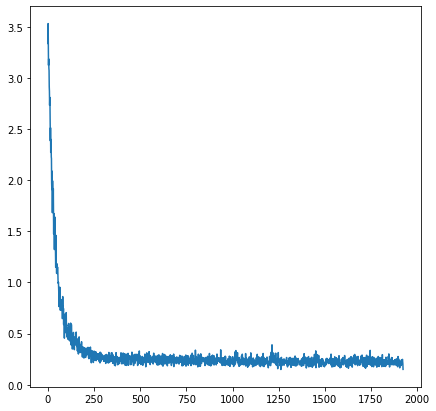

In [22]:
#--- set up ---
if torch.cuda.is_available():
    device = torch.device('cuda')
    print('using gpu')
else:
    print('using cpu')
    device = torch.device('cpu')

model = CNN().to(device)

# OPTIMIZERS
optimizer_1 = optim.Adam(model.parameters(), lr=LR, weight_decay=0.05)
optimizer_2 = optim.RMSprop(model.parameters(), lr=LR, weight_decay=0.1)
optimizer_3 = optim.SGD(model.parameters(), lr=LR, momentum=0.5)
loss_function = nn.CrossEntropyLoss()

optimizer = optimizer_1

#--- training ---

previous_train_loss = 1000000

batch_losses = []

for epoch in range(N_EPOCHS):
    train_loss = 0
    train_correct = 0
    total = 0
    for batch_num, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        
        # Compute prediction error
        optimizer.zero_grad()
        pred = model(data)
        loss = loss_function(pred, target)

        train_loss += loss.item()
        
        batch_losses.append(loss.item())
        
        total += len(target)
        train_correct += torch.sum(pred.argmax(1) == target)
        
        # Backpropagation
        loss.backward()
        optimizer.step()

        print('Training: Epoch %d - Batch %d/%d: Loss: %.4f | Train Acc: %.3f%% (%d/%d)' % 
              (epoch, batch_num, len(train_loader), train_loss / (batch_num + 1), 
               100. * train_correct / total, train_correct, total))
    
    print("Epoch train loss: " + str(train_loss))
    print("Previous epoch train loss: " + str(previous_train_loss))
    
    # EARLY STOPPING
    if train_loss > previous_train_loss:
        print('early stopping')
        break
        
    previous_train_loss = train_loss

plt.figure(figsize=(7, 7))
plt.plot(batch_losses)
plt.show()

Evaluating: Batch 0/37: Loss: 0.3649 | Test Acc: 100.000% (100/100)
Evaluating: Batch 1/37: Loss: 0.3451 | Test Acc: 100.000% (200/200)
Evaluating: Batch 2/37: Loss: 0.3651 | Test Acc: 98.667% (296/300)
Evaluating: Batch 3/37: Loss: 0.3795 | Test Acc: 97.250% (389/400)
Evaluating: Batch 4/37: Loss: 0.3830 | Test Acc: 97.800% (489/500)
Evaluating: Batch 5/37: Loss: 0.3578 | Test Acc: 98.000% (588/600)
Evaluating: Batch 6/37: Loss: 0.3539 | Test Acc: 97.000% (679/700)
Evaluating: Batch 7/37: Loss: 0.3412 | Test Acc: 96.750% (774/800)
Evaluating: Batch 8/37: Loss: 0.3319 | Test Acc: 96.778% (871/900)
Evaluating: Batch 9/37: Loss: 0.3119 | Test Acc: 97.100% (971/1000)
Evaluating: Batch 10/37: Loss: 0.3054 | Test Acc: 97.273% (1070/1100)
Evaluating: Batch 11/37: Loss: 0.3654 | Test Acc: 95.417% (1145/1200)
Evaluating: Batch 12/37: Loss: 0.4104 | Test Acc: 93.846% (1220/1300)
Evaluating: Batch 13/37: Loss: 0.4475 | Test Acc: 92.786% (1299/1400)
Evaluating: Batch 14/37: Loss: 0.4402 | Test Ac

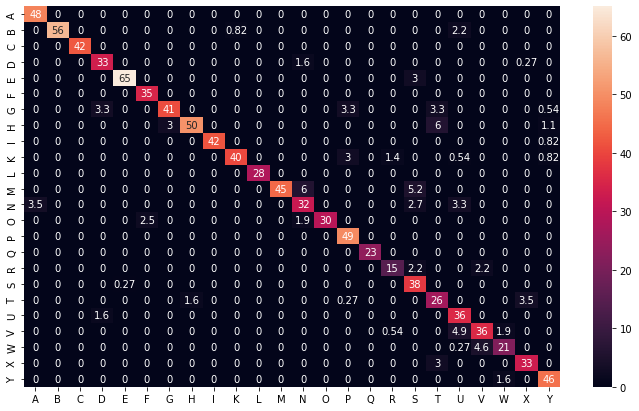

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

#--- test ---
test_loss = 0
test_correct = 0
total = 0

preds = []
targets = []

with torch.no_grad():
    for batch_num, (data, target) in enumerate(test_loader):
        data, target = data.to(device), target.to(device)
        
        pred = model(data)
        loss = loss_function(pred, target)
        
        test_loss += loss.item()
        total += len(target)
        test_correct += torch.sum(pred.argmax(1) == target)
        preds.extend(pred.argmax(1).cpu().numpy())
        targets.extend(target.cpu().numpy())

        print('Evaluating: Batch %d/%d: Loss: %.4f | Test Acc: %.3f%% (%d/%d)' % 
              (batch_num, len(test_loader), test_loss / (batch_num + 1), 
               100. * test_correct / total, test_correct, total))

    cf_matrix = confusion_matrix(targets, preds)
    df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix) * 1000, 
                         index = [i for i in 'ABCDEFGHIKLMNOPQRSTUVWXY'],
                         columns=[i for i in 'ABCDEFGHIKLMNOPQRSTUVWXY'])
    plt.figure(figsize=(12, 7))
    sn.heatmap(df_cm, annot=True)